In [1]:
import pandas as pd
import numpy as np
import scipy.stats as f
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
%matplotlib inline

Problem 1
Cold Storage started its operations in Jan 2016. They are in the business of storing Pasteurized Fresh
Whole or Skimmed Milk, Sweet Cream, Flavoured Milk Drinks. To ensure that there is no change of
texture, body appearance, separation of fats the optimal temperature to be maintained is between 2º - 4º
C.
In the first year of business, they outsourced the plant maintenance work to a professional company with stiff
penalty clauses. It was agreed that if it was statistically proven that the probability of temperature going
outside the 2º - 4º C during the one-year contract was above 2.5% and less than 5% then the penalty would
be 10% of AMC (annual maintenance case). In case it exceeded 5% then the penalty would be 25% of the
AMC fee. The average temperature data at the date level is given in the file
“Cold_Storage_Temp_Data_.csv”
1. Find mean cold storage temperature for Summer, Winter, and Rainy Season. (7 marks)
2. Find the overall mean for the full year. (7 marks)
3. Find Standard Deviation for the full year. (7 marks)
4. Assume Normal distribution, what is the probability of temperature having fallen below 2º C? (7 marks)
5. Assume Normal distribution, what is the probability of temperature having gone above 4º C? (7 marks)
6. What will be the penalty for the AMC Company? (5 marks)
Dataset to be used for Problem 1:
Cold_Storage_Temp_Data_.csv

In [2]:
df = pd.read_csv('Cold_Storage_Temp_Data_-1.csv')

In [3]:
df.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,365.0,15.720548,8.808321,1.0,8.0,16.0,23.0,31.0
Temperature,365.0,3.002466,0.465832,1.7,2.7,3.0,3.3,4.5


In [5]:
df.shape

(365, 4)

In [6]:
df.isna().sum()

Season         0
Month          0
Date           0
Temperature    0
dtype: int64

In [7]:
df.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       365 non-null    object 
 1   Month        365 non-null    object 
 2   Date         365 non-null    int64  
 3   Temperature  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


# Find mean cold storage temperature for Summer, Winter, and Rainy Season. (7 marks)

In [9]:
pd.crosstab(index=df['Temperature'], columns=df['Season']).sum()


Season
Rainy     122
Summer    120
Winter    123
dtype: int64

In [10]:

#The mean of Seasons are as below. The Total of Objects of Season is above.

#Sum	3.15
#Win	3
#Rainy	3.09

#Mean = Sum of Objects/Number of Objects.

Rainy = 376.7/122
print('Rainy =',Rainy)

Summer = 377.7/120
print('Summer =',Summer)

Winter = 341.5/123
print('Winter =',Winter)


Rainy = 3.0877049180327867
Summer = 3.1475
Winter = 2.7764227642276422


# Find the overall mean for the full year

In [11]:
pd.crosstab(index=df['Temperature'], columns=df['Season']).sum().mean()

121.66666666666667

In [12]:
df_mean = df.Temperature.mean()
print('Overall mean of Temperature for the full year is',df_mean)

Overall mean of Temperature for the full year is 3.0024657534246546


# Find Standard Deviation for the full year.

In [13]:
pd.crosstab(index=df['Temperature'], columns=df['Season']).sum().std()

1.5275252316519468

In [14]:
df_std = df.Temperature.std()
print ('Standard Deviation of Temperature for the full year is',df_std)

Standard Deviation of Temperature for the full year is 0.4658319416510761


# Assume Normal distribution, what is the probability of temperature having fallen below 2º C?

<AxesSubplot:xlabel='Temperature', ylabel='count'>

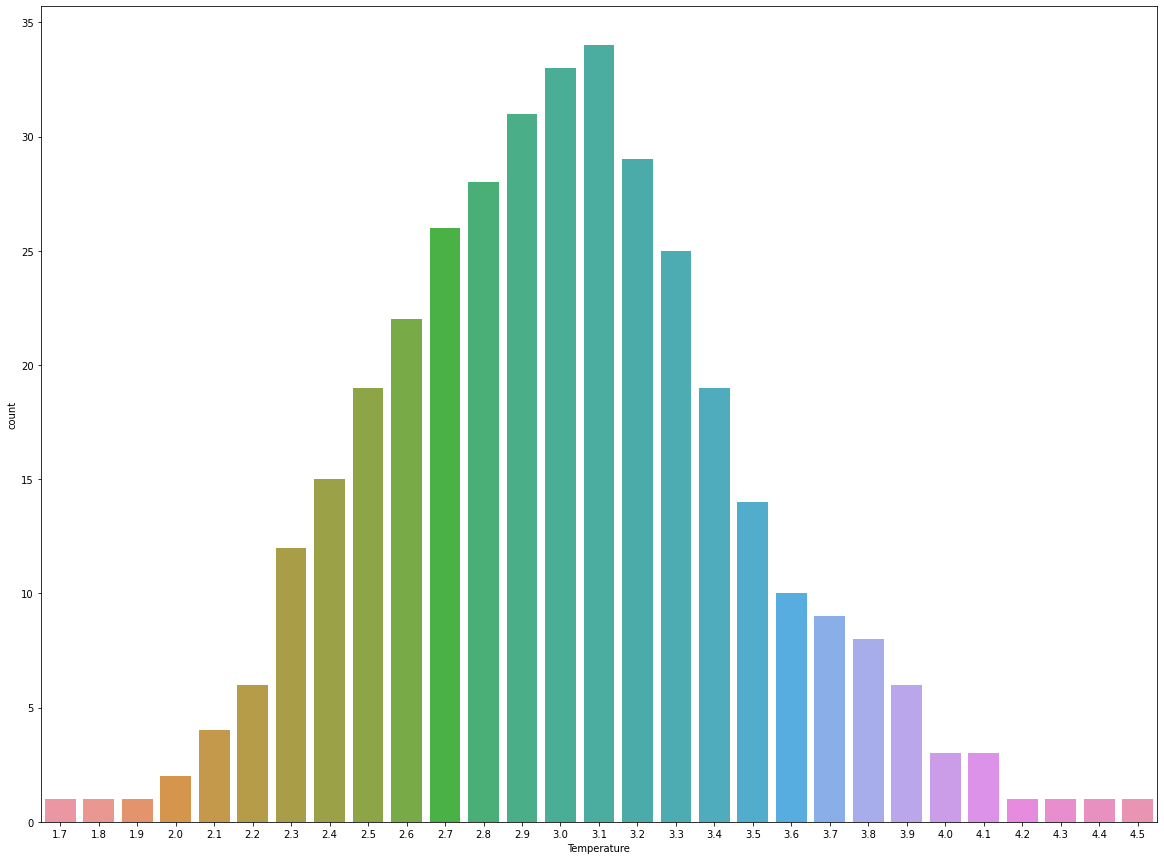

In [15]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.countplot(x="Temperature", data=df)

In [16]:
df.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [17]:
mean = df.Temperature.mean()
mean

3.0024657534246546

In [18]:
std = df.Temperature.std()
std

0.4658319416510761

In [19]:
#Standard Deviation of Temperature for the full year is 0.4658319416510761.
#Overall mean of Temperature for the full year is 3.0024657534246546.

#Looking at the quest we need to find the probability of Temp falling below 2 Degree Celcius. 
#putting it into formula z = x - Mu /@. (Mu = Mean, @ =  Standard Daviation)

z = (2 - 3.0024657534246546) / 0.4658319416510761
z




-2.151990157376403

In [20]:
#Converting it into a whole number then the calculation is as below.

#Standard Deviation of Temperature for the full year is 0.4658319416510761 = 0.5.
#Overall mean of Temperature for the full year is 3.0024657534246546 = 3.

#Looking at the quest we need to find the probability of Temp falling below 2 Degree Celcius. 
#putting it into formula z = x - Mu /@. (Mu = Mean, @ =  Standard Daviation)

z1 = (2 - 3.00) / 0.5
z1



-2.0

In [21]:
print(stats.norm.cdf(-2.151990157376403))


0.015699064791364483


This denotes that 1% is the probability of temperature having fallen below 2º C

In [22]:
print(stats.norm.cdf(-2.0))

0.022750131948179195


This denotes that 2% is the probability of temperature having fallen below 2º C

# Assume Normal distribution, what is the probability of temperature having gone above 4º C? (7 marks)


<AxesSubplot:xlabel='Temperature', ylabel='count'>

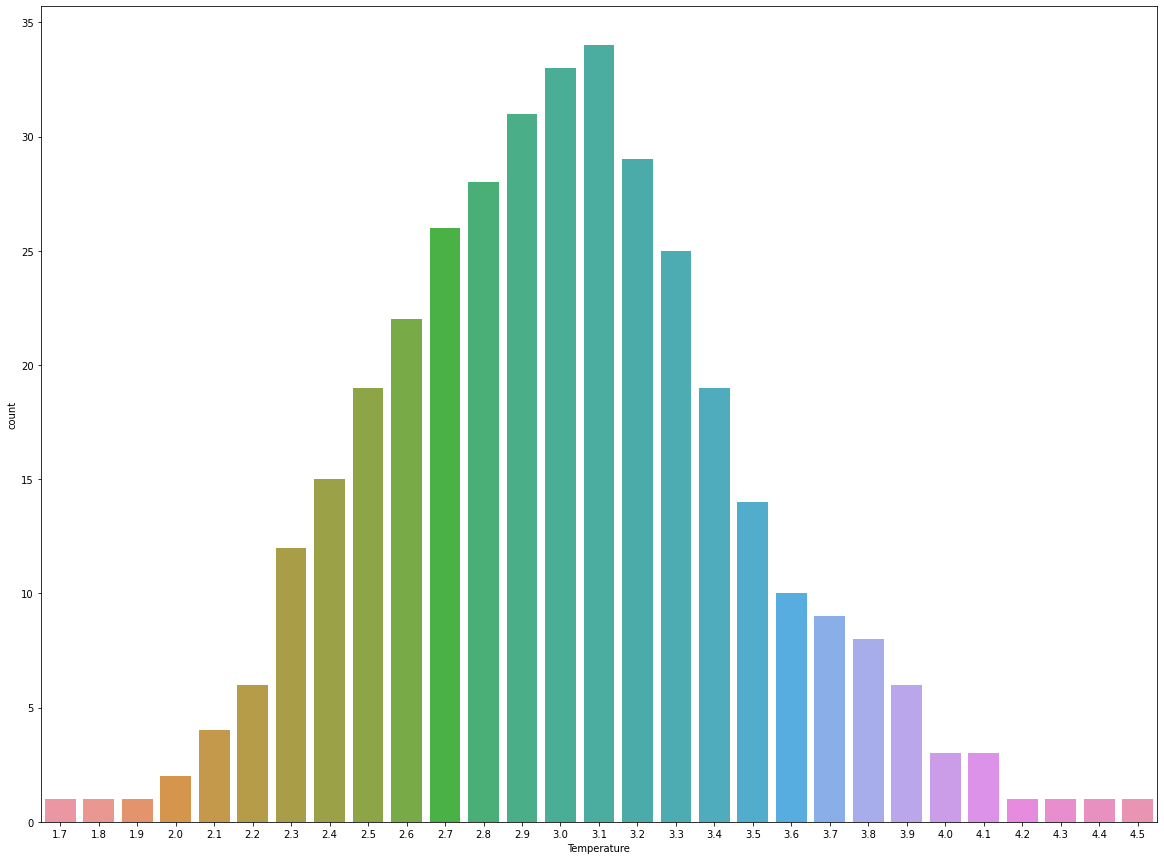

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(x="Temperature", data=df)

In [24]:
#Calculating the Z score.
Z = (4 - 3.002) / 0.465
Z


2.146236559139785

We can round this 2.141403706752536 result to 2.2.

In [25]:
Z1= (4 - 3.00) / 0.5
Z1


2.0

In [26]:
1 - stats.norm.cdf(2.146236559139785)

0.015927055086573216

This can denote that 1% s the probability of temperature having gone above 4º C. 

In [27]:
1 - stats.norm.cdf(2.0)

0.02275013194817921

This can denote that 2% is the probability of temperature having gone above 4º C. 

# What will be the penalty for the AMC Company? (5 marks) 

It was agreed that if it was statistically proven that the probability of temperature going outside the 2º - 4º C during the one-year contract was above 2.5% and less than 5% then the penalty would be 10% of AMC (annual maintenance case). In case it exceeded 5% then the penalty would be 25% of the AMC fee. 

Hence Looking at the Statistical Data we can conclude that that AMC Company would not pay any Penalty.

# Problem 2

In Mar 2018, Cold Storage started getting complaints from their clients that they have been getting complaints from
end consumers of the dairy products going sour and often smelling. On getting these complaints, the supervisor
pulls out data of the last 35 days’ temperatures. As a safety measure, the Supervisor has been vigilant to maintain
the mean temperature 3.9º C or below.
Assume 3.9º C as the upper acceptable mean temperature and at alpha = 0.1 do you feel that there is a
need for some corrective action in the Cold Storage Plant or is it that the problem is from the procurement
side from where Cold Storage is getting the Dairy Products. The data of the last 35 days is in
“Cold_Storage_Mar2018_.csv”
1. Which Hypothesis test shall be performed to check if corrective action is needed at the cold storage
plant? Justify your answer. (6 marks)
2. State the Hypothesis and do the necessary calculations to accept or reject the corresponding null
hypothesis. (8 marks)
3. Give your inference. (6 marks)
Dataset to be used for Problem 2: Cold_Storage_Mar2018_.csv

# Which Hypothesis test shall be performed to check if corrective action is needed at the cold storage plant? Justify your answer. (6 marks)

Test = 1 sample t test 
Because we do not have the Standard Deviation provided.

Level of Significance alpha = 0.1.

STD not given hence T - Test

n = 35

Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 34.

Since the sole purpose of the test is to check whether the Temperature was 3.9 Degree or more, we would prefer a 1 sample t test.

In [28]:
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [29]:
Cold = pd.read_csv('Cold_Storage_Mar2018_ (1).csv')
Cold.head()

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8


In [30]:
Cold.tail()

,Season,Month,Date,Temperature
30,Summer,Mar,13,4.2
31,Summer,Mar,14,4.2
32,Summer,Mar,15,3.8
33,Summer,Mar,16,3.9
34,Summer,Mar,17,3.9


In [31]:
Cold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         35 non-null     object 
 1   Month          35 non-null     object 
 2   Date           35 non-null     int64  
 3    Temperature   35 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [32]:
Cold.shape

(35, 4)

In [33]:
Cold.describe()

,Date,Temperature
count,35.000000,35.000000
mean,14.400000,3.974286
std,7.389181,0.159674
min,1.000000,3.800000
25%,9.500000,3.900000
50%,14.000000,3.900000
75%,19.500000,4.100000
max,28.000000,4.600000


In [34]:
Cold.isna().sum()

Season           0
Month            0
Date             0
 Temperature     0
dtype: int64

In [35]:
Cold.duplicated().sum()

0

# State the Hypothesis and do the necessary calculations to accept or reject the corresponding null hypothesis. (8 marks)

H0: The Mean Temperature was equal to 3.9 Degree.

H1: The Mean Temperature was not equal and more than 3.9 Degree.

In [36]:
mn = df.Temperature.mean()
mn

3.0024657534246546

In [37]:
t_statistic, p_value = ttest_1samp(df['Temperature'],3.9)
print('One sample t test \nt statistics: {0} P Values {1}'.format(t_statistic, p_value))

One sample t test 
t statistics: -36.81020164327708 P Values 9.399399989484991e-125


Per the Query, assumed 3.9º C as the upper acceptable mean temperature and at alpha = 0.1.

As the P Value is less than alpha = 1. We have failed to Reject the Null Hypothesis.



# Give your inference. (6 marks)

So considering the test results we can infer with the 99% confidence Level that the Temperature was equal to 3.9 Degrees in those days given in the Sample data.